In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import kneighbors_graph, NearestNeighbors

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8-whitegrid")
pd.set_option("display.max_columns", None)

In [ ]:
# Cargar los datos
data = load_breast_cancer()

breast = pd.DataFrame(data.data, columns=data.feature_names)
# Primera vista de los datos
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Estructura del dataset
def estructura(df):
    print(f"Cantidad de filas: {df.shape[0]}")
    print(f"Cantidad de columnas: {df.shape[1]}")
    print(f"Cantidad de datos: {df.size}")
    print(f"Hay valores nulos? {df.isnull().any().any()}")
    print(f"Cuantos? {df.isnull().sum().sum()}")
    print(f"Columnas: {df.columns}")
    
estructura(breast)

Cantidad de filas: 569
Cantidad de columnas: 30
Cantidad de datos: 17070
Hay valores nulos? False
Cuantos? 0
Columnas: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [5]:
# Información del dataset
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
# Estadisticas del dataset
breast.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


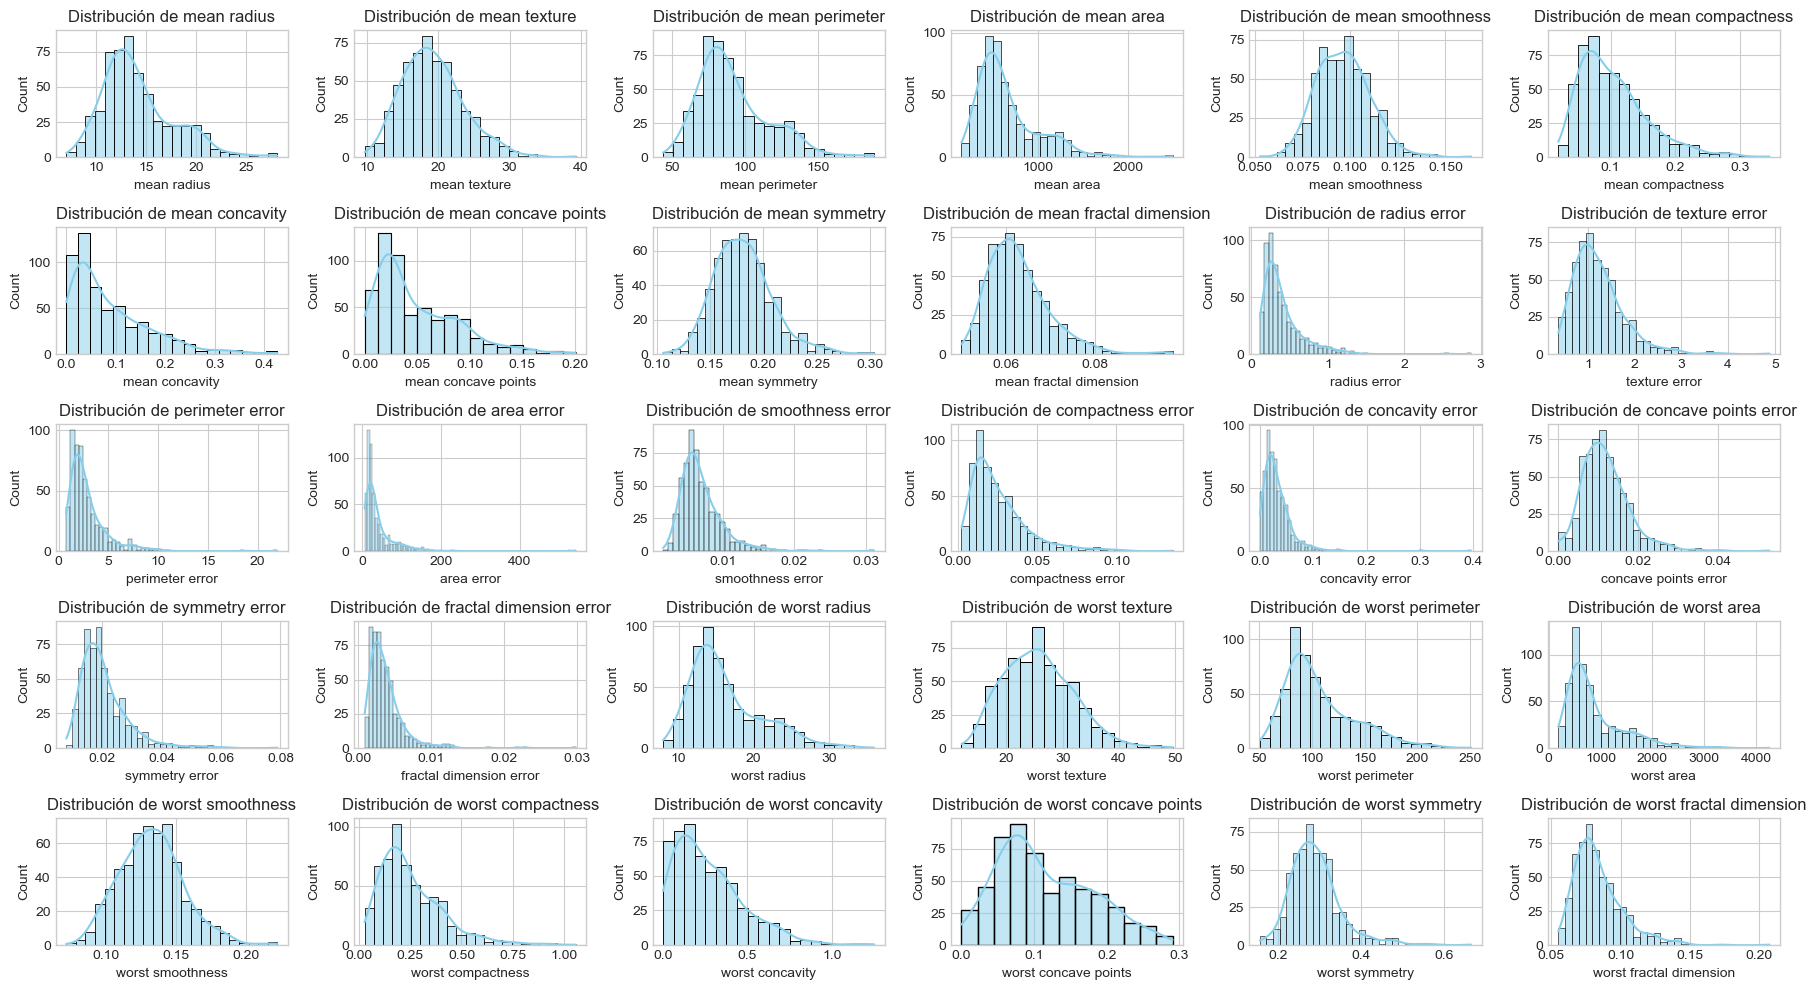

In [8]:
# Distribución de las columnas
fig, axes = plt.subplots(5, 6, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(breast.columns):
    ax = axes[i]
    sns.histplot(data=breast, x=col, color="skyblue", edgecolor="k", kde=True, ax=ax)
    ax.set_title(f"Distribución de {col}")
    
plt.tight_layout()

plt.show()

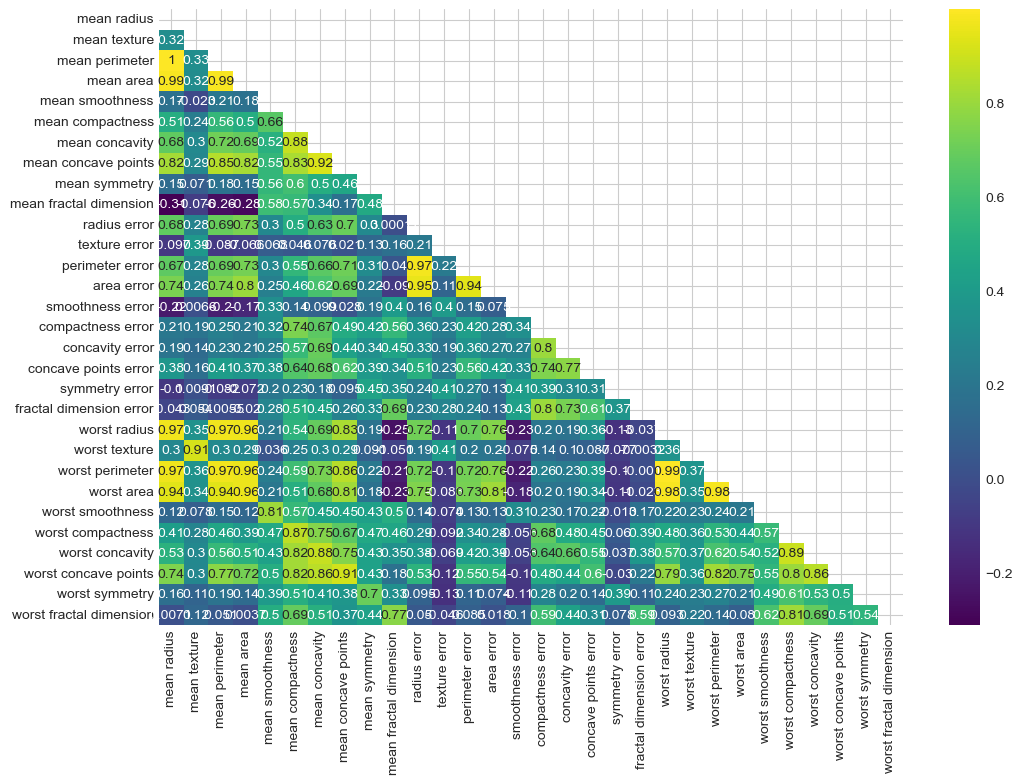

In [12]:
# Correlación entre variables
correlacion = breast.corr()

mask = np.triu(np.ones_like(correlacion, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(correlacion, annot=True, mask=mask, cmap="viridis")

plt.show()

<Figure size 1200x600 with 0 Axes>

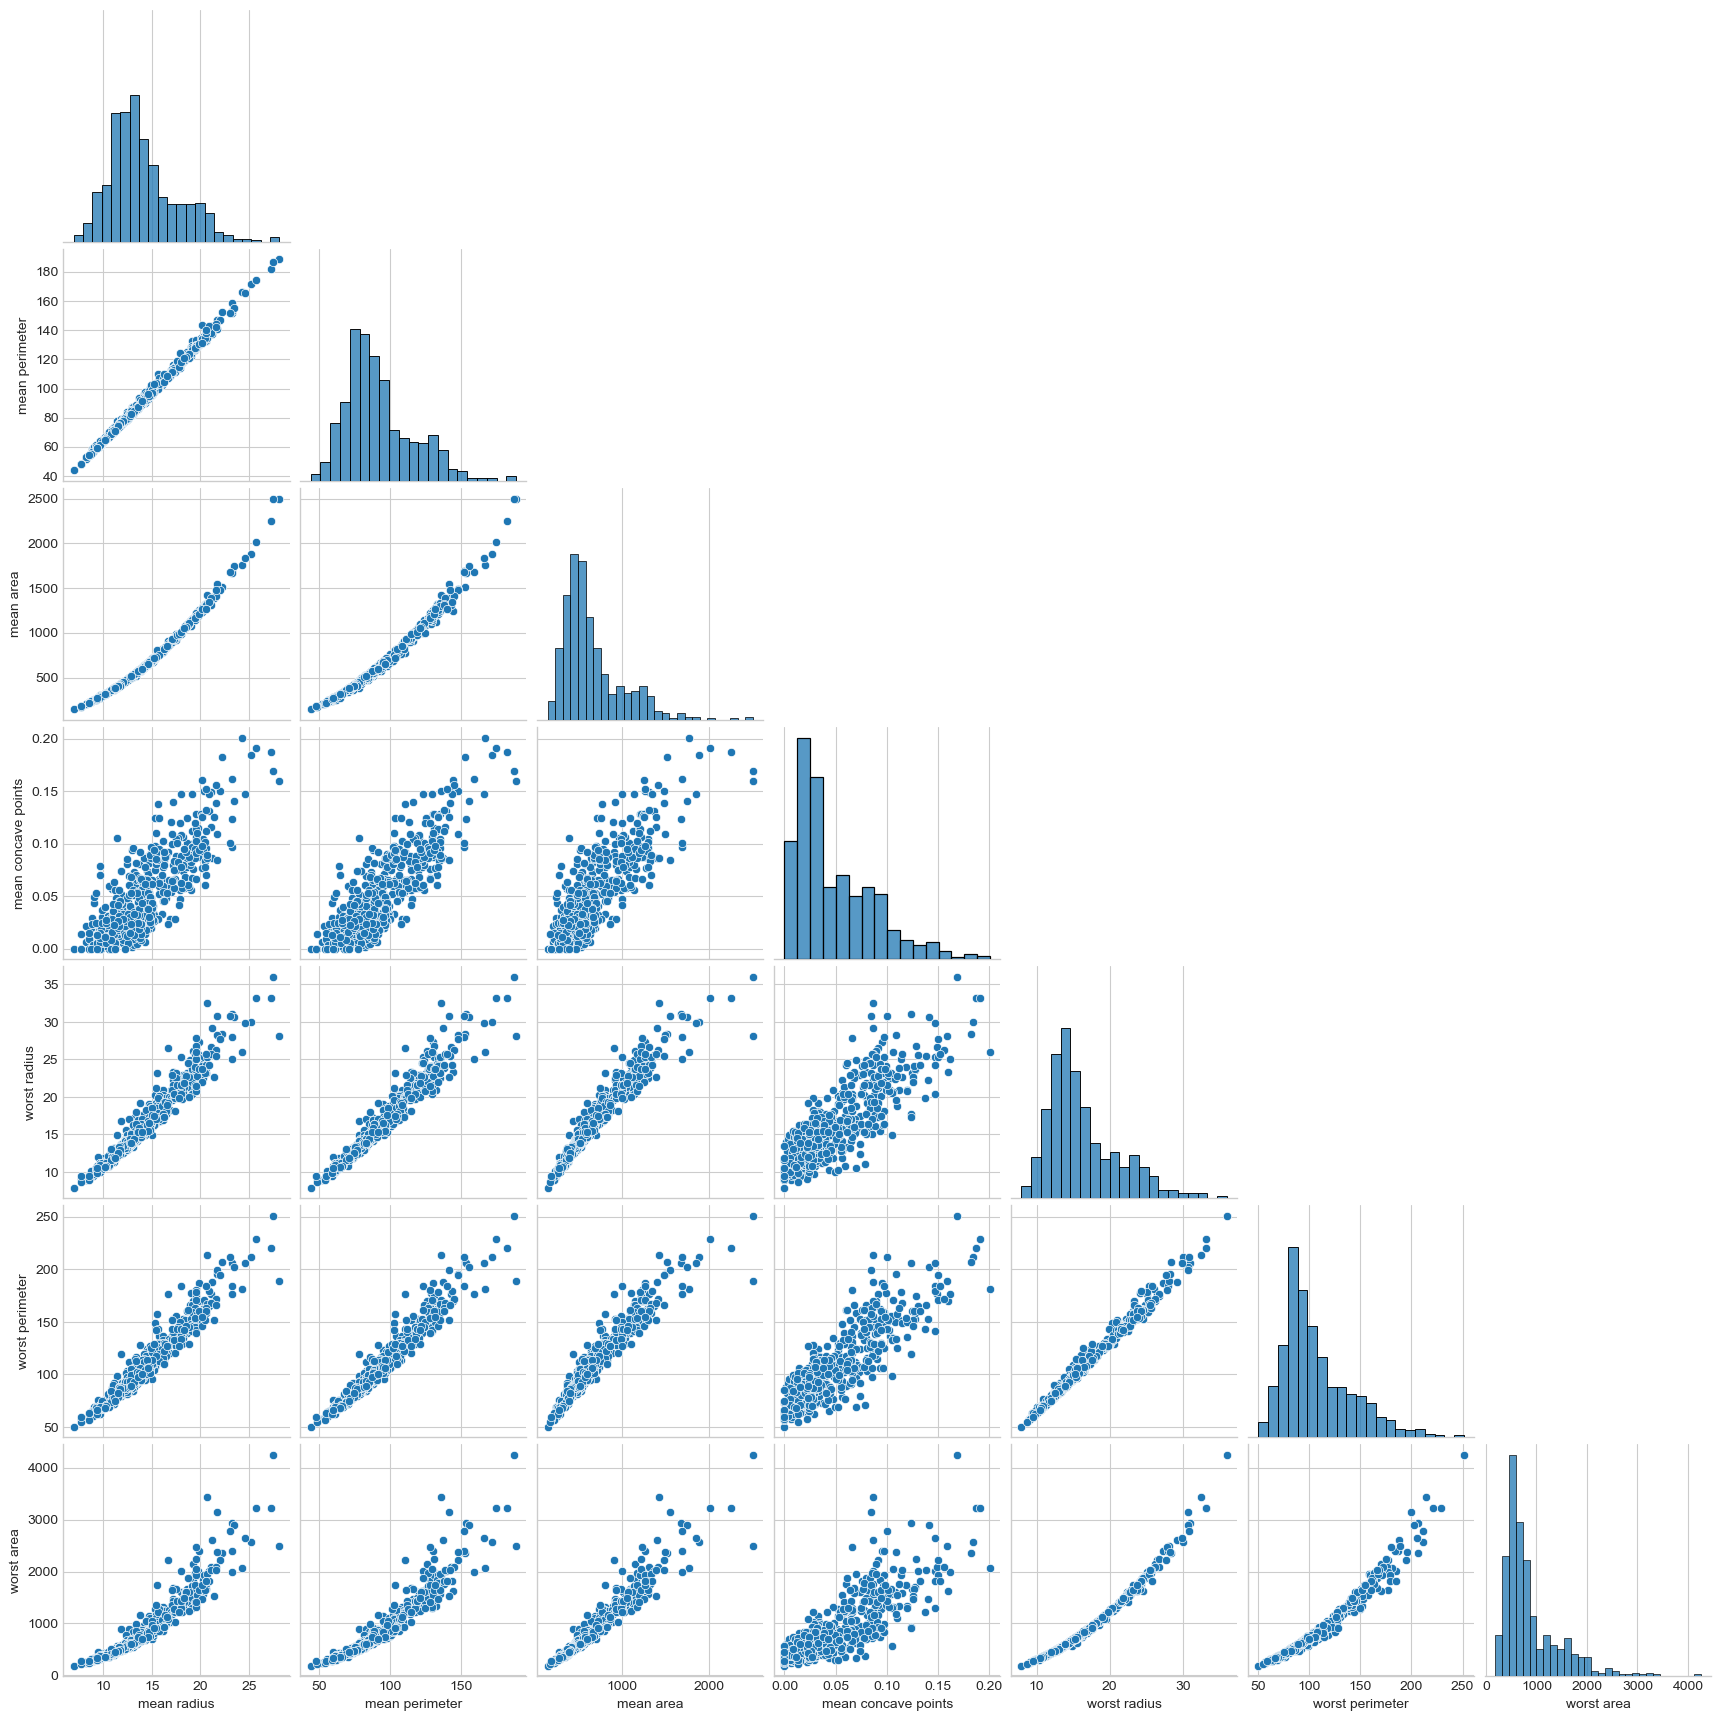

In [14]:
# Pairplot de relaciones con mejor correlación
plt.figure(figsize=(12, 6))

sns.pairplot(breast, 
             vars=["mean radius", "mean perimeter", "mean area", "mean concave points", "worst radius", "worst perimeter", "worst area"],
             corner=True)

plt.show()

In [16]:
# Estandarización de los datos
scaler = StandardScaler()

breast_scaled = scaler.fit_transform(breast)

breast_scaled = pd.DataFrame(breast_scaled, columns=breast.columns)

breast_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


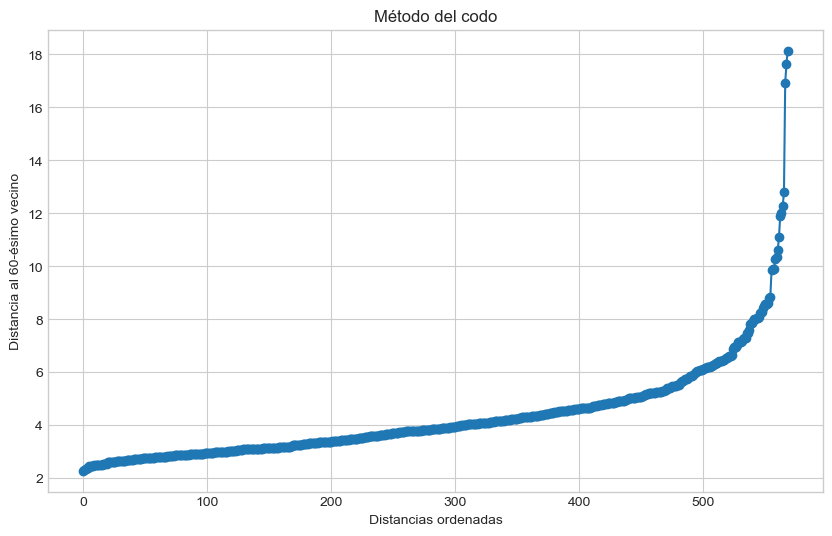

In [ ]:
# Método del codo para un epsilon óptimo para DBSCAN
minpts = 2 * breast_scaled.shape[1]

nbrs = NearestNeighbors(n_neighbors=minpts).fit(breast_scaled)

distances, indices = nbrs.kneighbors(breast_scaled)

k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(10, 6))

plt.plot(k_distances, marker="o")

plt.title("Método del codo")

plt.xlabel("Distancias ordenadas")

plt.ylabel(f"Distancia al {minpts}-ésimo vecino")

plt.show()

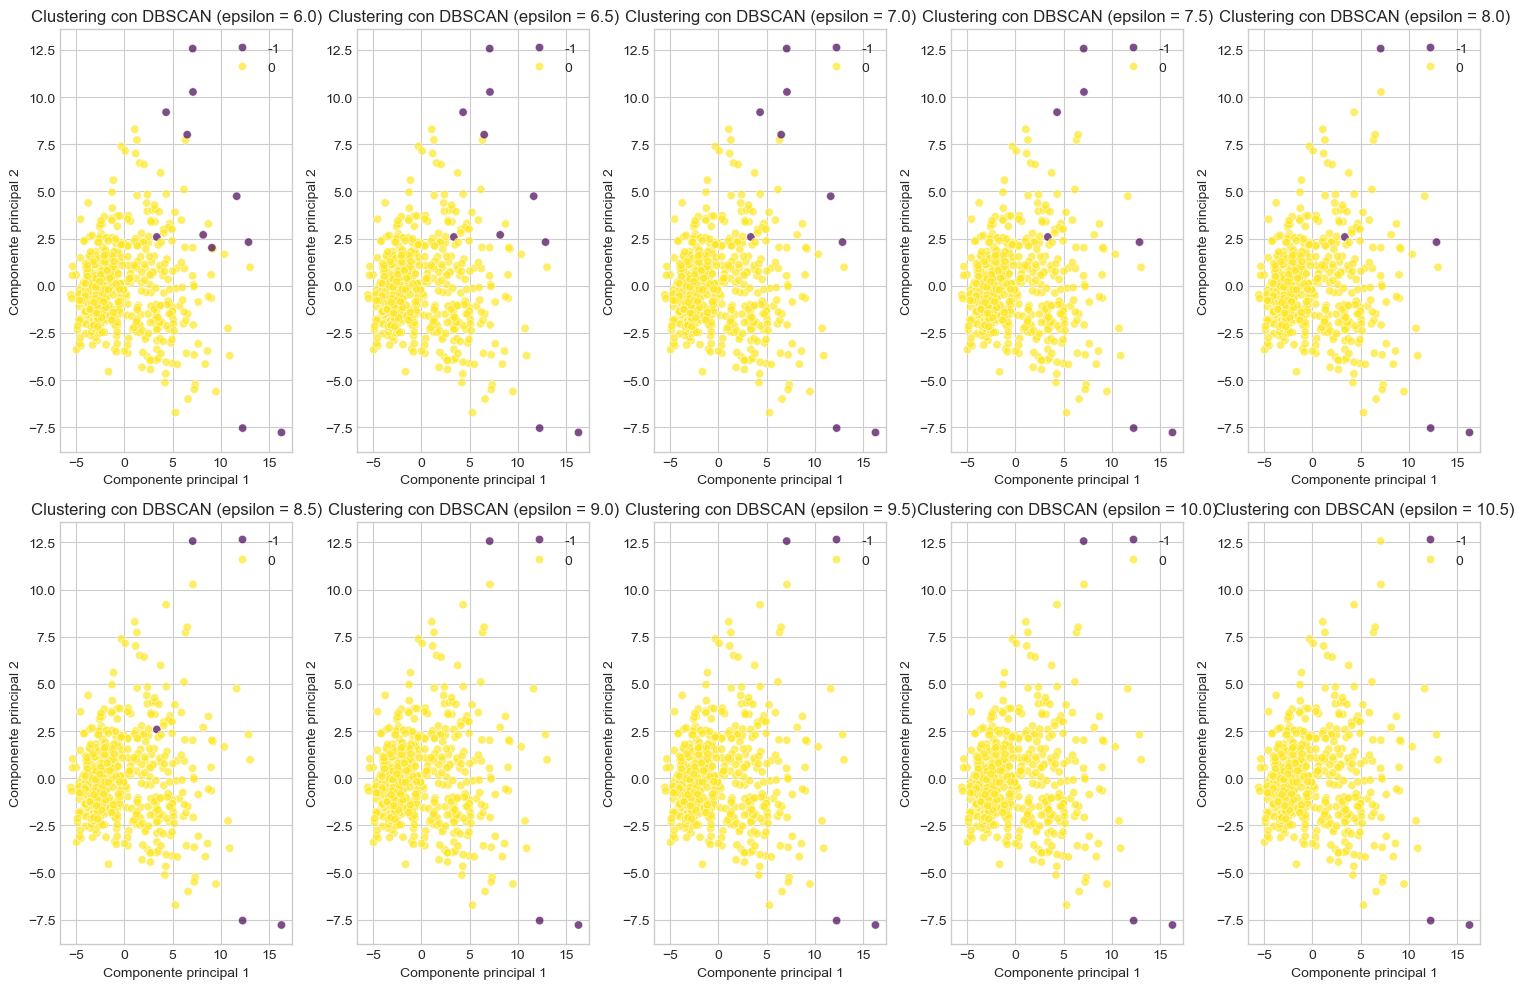

In [ ]:
# Guardar los valores del coeficiente de la silueta para luego elegir un epsilon óptimo
sil_db = []
# Plotear los diferentes gráficos de DBSCAN
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()
# Ajustar DBSCAN y PCA para detectar outliers
for idx, i in enumerate(np.arange(6, 11, 0.5)):
    db = DBSCAN(eps=i, min_samples=5)
    clusters = db.fit_predict(breast_scaled)
    
    estimator = PCA(n_components=2)
    
    breast_pca = estimator.fit_transform(breast_scaled)
    
    sil_db_score = silhouette_score(breast_scaled, clusters)
    
    sil_db.append(sil_db_score)
    
    ax=axes[idx]
    sns.scatterplot(x=breast_pca[:, 0], y=breast_pca[:, 1], hue=clusters, palette="viridis", alpha=0.7, ax=ax)
    ax.set_title(f"Clustering con DBSCAN (epsilon = {i})")
        
    ax.set_xlabel("Componente principal 1")
        
    ax.set_ylabel("Componente principal 2")
    
plt.tight_layout()
    
plt.show()

In [ ]:
# Valores de la silueta
indices = [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5]

for i, val in zip(indices, sil_db):
    print(f"Para epsilon {i} el coeficiente de la silueta es {val}")

Para epsilon 6 el oeficiente de la silueta es 0.5585058394309054
Para epsilon 6.5 el oeficiente de la silueta es 0.5681713787029556
Para epsilon 7 el oeficiente de la silueta es 0.5773317937512605
Para epsilon 7.5 el oeficiente de la silueta es 0.592710032072899
Para epsilon 8 el oeficiente de la silueta es 0.6152393968214306
Para epsilon 8.5 el oeficiente de la silueta es 0.6246180329449672
Para epsilon 9 el oeficiente de la silueta es 0.6588579637880487
Para epsilon 9.5 el oeficiente de la silueta es 0.6588579637880487
Para epsilon 10 el oeficiente de la silueta es 0.6588579637880487
Para epsilon 10.5 el oeficiente de la silueta es 0.6606668813897673


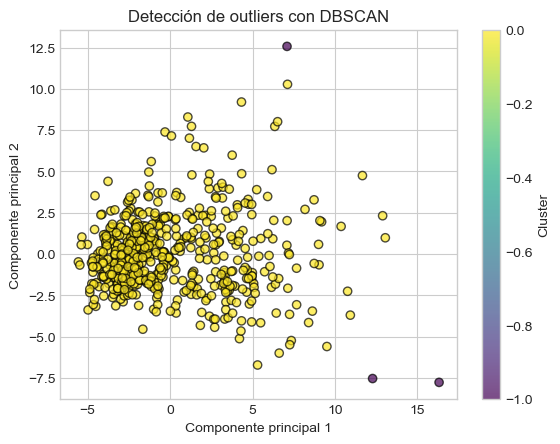

In [ ]:
# Ajustamos DBSCAN con el epsilon encontrado
db = DBSCAN(eps=9, min_samples=5)

clusters = db.fit_predict(breast_scaled)

estimator = PCA(n_components=2)

breast_pca = estimator.fit_transform(breast_scaled)

plt.scatter(x=breast_pca[:, 0], y=breast_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7, edgecolors="k")

plt.title("Detección de outliers con DBSCAN")

plt.xlabel("Componente principal 1")

plt.ylabel("Componente principal 2")

plt.colorbar(label="Cluster")


plt.show()

In [ ]:
# Verificar que la cantidad de outliers coincida con los del gráfico
np.unique(clusters, return_counts=True)

(array([-1,  0], dtype=int64), array([  3, 566], dtype=int64))

In [38]:
# Valores para obtener el número óptimo de clusters

wcss = []
davies = []
calinski = []

0.3447344346611054


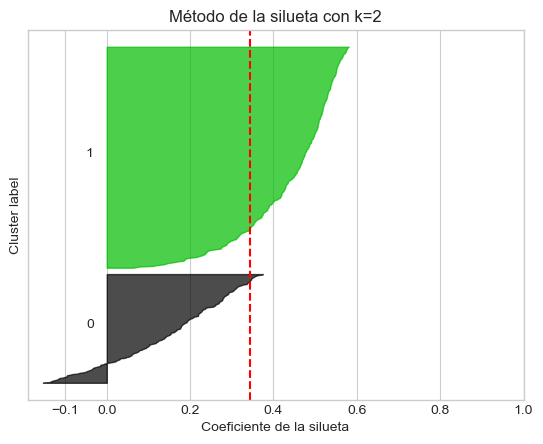

0.3151862330494096


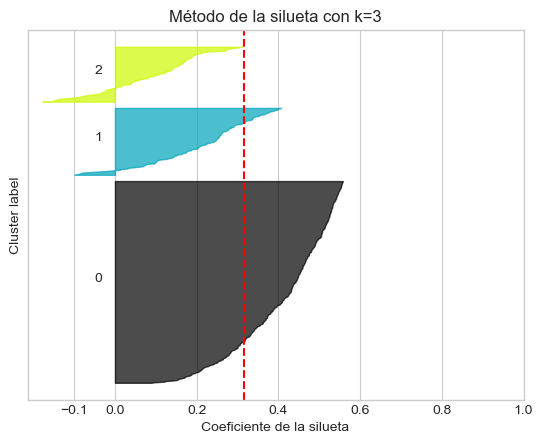

0.2457349950813171


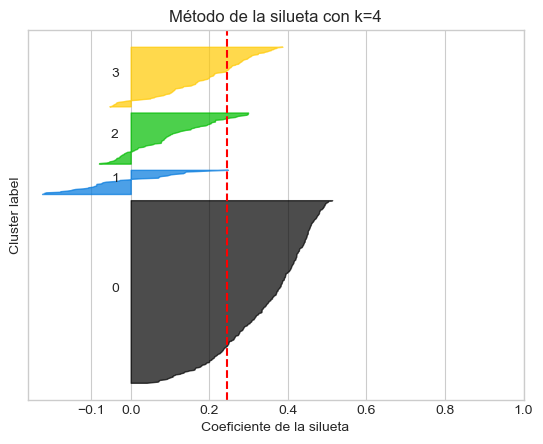

0.15036893589823103


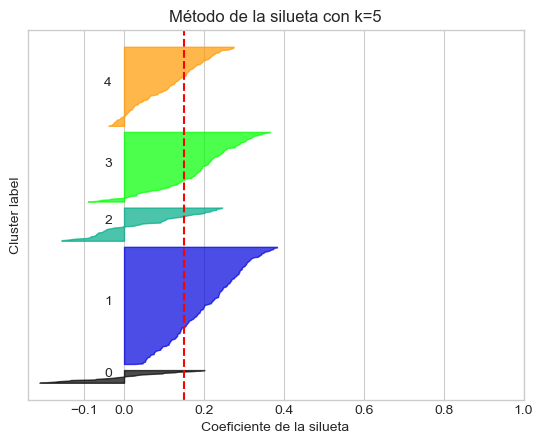

0.15833751320345085


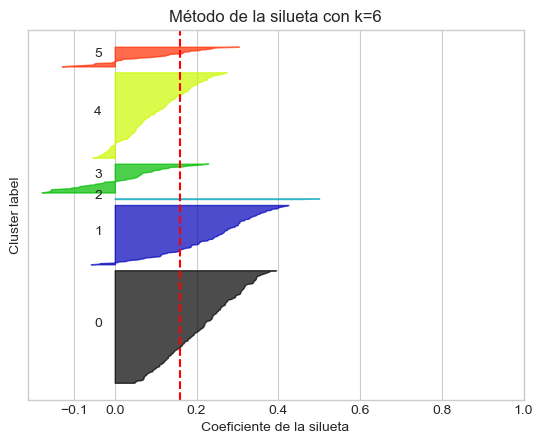

0.14470864007399462


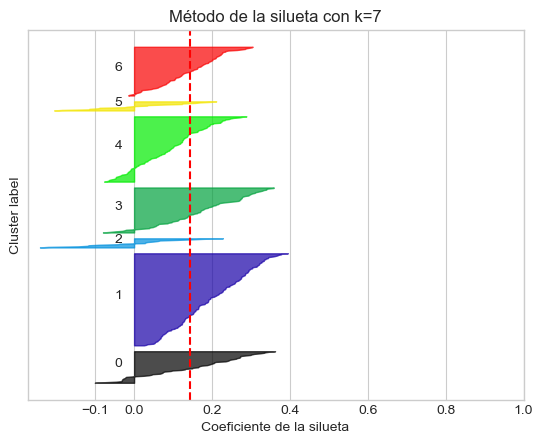

0.1452663708673048


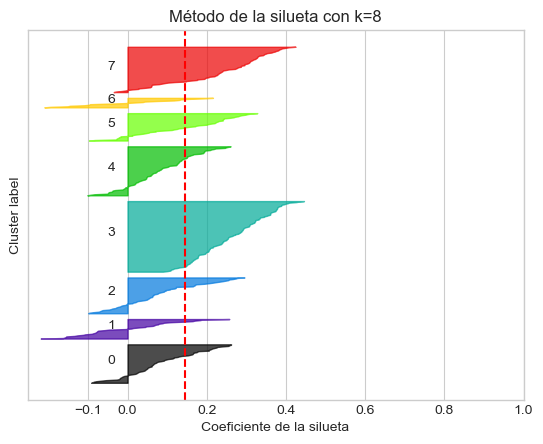

0.13264928096916806


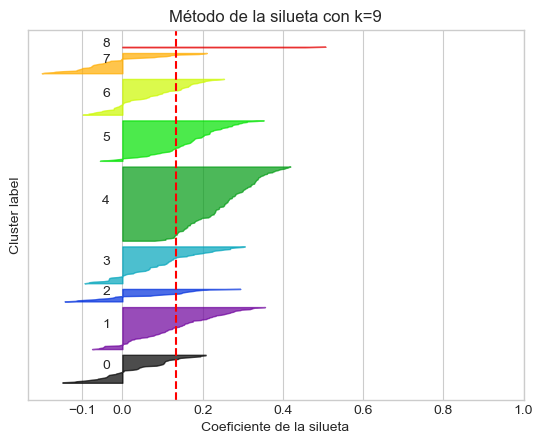

0.12746360517137567


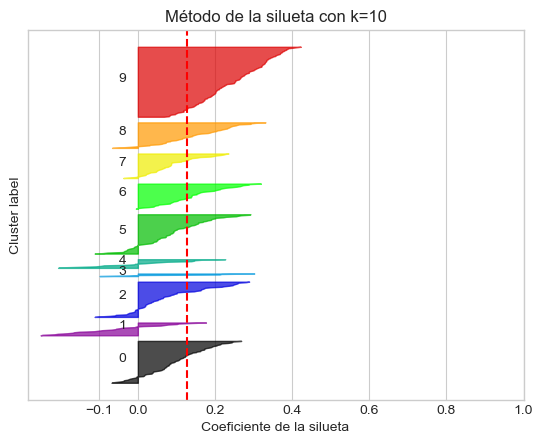

In [ ]:
# Método de la silueta
for n_cluster in range(2, 11):
    km = KMeans(n_clusters=n_cluster)
    
    pred = km.fit_predict(breast_scaled)
    
    sil_coef = silhouette_score(breast_scaled, pred)
    
    wcss.append(km.inertia_)
    
    davies.append(davies_bouldin_score(breast_scaled, pred))
    
    calinski.append(calinski_harabasz_score(breast_scaled, pred))
    
    sil_vals = silhouette_samples(breast_scaled, pred)
    
    y_lower = 10
    
    fig = plt.figure()
    
    print(sil_coef)
    
    for i in range(n_cluster):
        ith_cluster_val = sil_vals[pred == i]
        
        ith_cluster_val.sort()
        
        size_cluster_i = ith_cluster_val.shape[0]
        
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_cluster)
        
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_val,
            edgecolor=color,
            facecolor=color,
            alpha=0.7
        )
        plt.text(-0.05, y_lower+0.5*size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    plt.title(f"Método de la silueta con k={n_cluster}")
    
    plt.xlabel("Coeficiente de la silueta")
    
    plt.ylabel("Cluster label")
    
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.yticks([])
    
    plt.axvline(x=sil_coef, c="red", linestyle="--")
    
    plt.show()

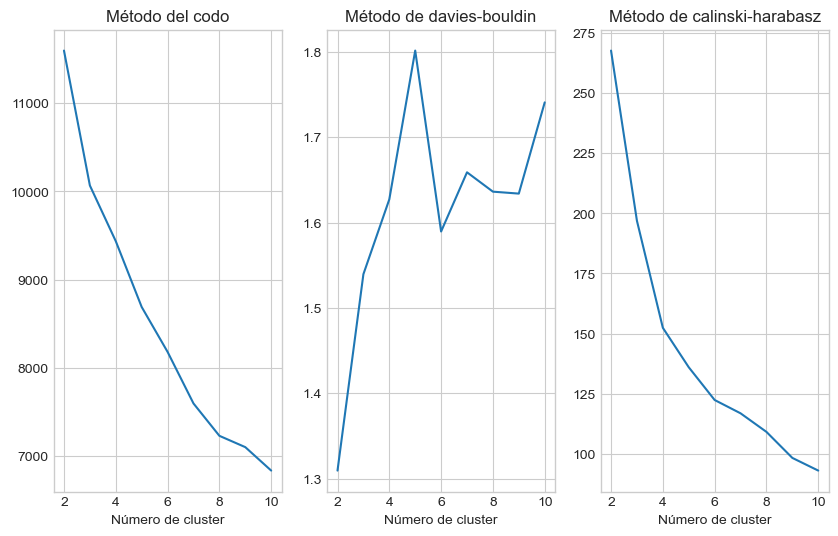

In [41]:
# Método del codo, de davies-bouldin y calinski-harabasz
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

rango = range(2, 11)

sns.lineplot(x=rango, y=wcss, ax=ax[0])
ax[0].set_title("Método del codo")
ax[0].set_xlabel("Número de cluster")
sns.lineplot(x=rango, y=davies, ax=ax[1])
ax[1].set_title("Método de davies-bouldin")
ax[1].set_xlabel("Número de cluster")
sns.lineplot(x=rango, y=calinski, ax=ax[2])
ax[2].set_title("Método de calinski-harabasz")
ax[2].set_xlabel("Número de cluster")

plt.show()

In [ ]:
# Aplicamos k-means
km = KMeans(n_clusters=2, max_iter=1000, n_init=100)

labels = km.fit_predict(breast_scaled)

In [ ]:
# Agregamos los resultados obtenidos al dataset original
breast["cluster"] = labels
# Distribución de nuestras predicciones
breast["cluster"].value_counts()

cluster
0    380
1    189
Name: count, dtype: int64

In [ ]:
# Agregamos los clusters reales
breast["target"] = data.target
# Distribución de los valores reales
breast["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

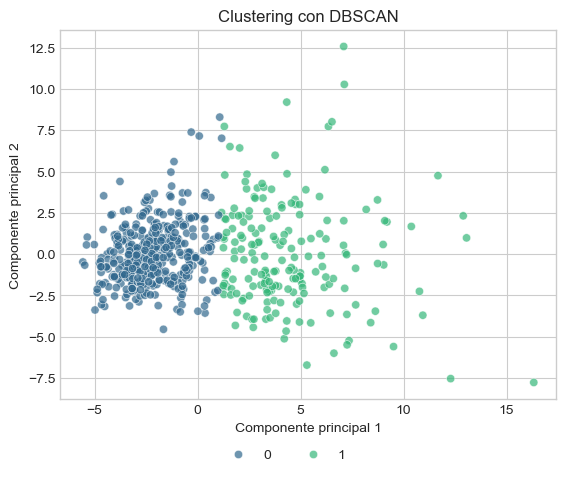

In [ ]:
# Gráfico de los clusters predichos con PCA
sns.scatterplot(x=breast_pca[:, 0], y=breast_pca[:, 1], hue=breast["cluster"], palette="viridis", alpha=0.7)

plt.title("Clustering con DBSCAN")

plt.xlabel("Componente principal 1")

plt.ylabel("Componente principal 2")

plt.legend(frameon=False, bbox_to_anchor=(0.6, -0.1), ncols=2)

plt.show()

In [46]:
# Observamos la performance del algoritmo
ari_score = adjusted_rand_score(breast["target"], breast["cluster"])
# Valor de la clusterización
ari_score

0.6707206476880808